In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('StressLevelDataset.csv')

In [4]:
#Number of Students
num_students = len(df)
print('Total Number of Students: ',num_students)

#Anxiety level mean
average_stress_levels = df['anxiety_level'].mean().round(2)
print('Average Stress Levels: ', average_stress_levels)

#Number of students with mental health history
students_with_mental_health_history = df[df['mental_health_history'] == 1]
num_students_with_mental_health_history = len('students_with_mental_history')
print('Students with Mental Health History Count: ', num_students_with_mental_health_history)

#Number of students with depression
students_with_depression = df[df['depression'] == 1]
num_students_with_depression = len('students_with_depression')
print('Number of Students with Depression:', num_students_with_depression)

Total Number of Students:  1100
Average Stress Levels:  11.06
Students with Mental Health History Count:  28
Number of Students with Depression: 24


In [5]:
psychological_factors = ['anxiety_level', 'self_esteem', 'depression', 'mental_health_history']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'basic_needs', 'safety']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

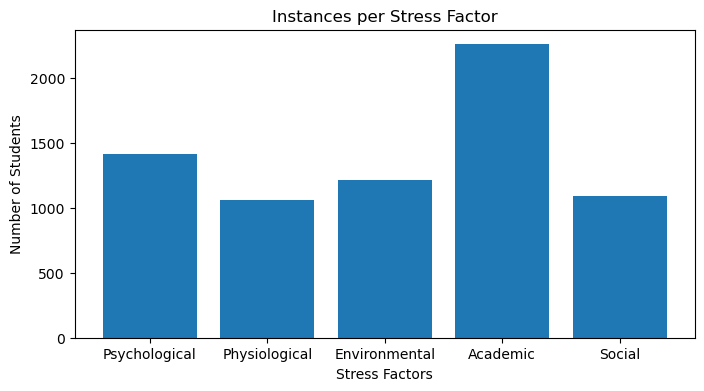

In [8]:
#Calculate the number of students with negative experiences or conditions for each factor

num_students_with_negative_psychological = df[psychological_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_physiological = df[physiological_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_environmental = df[environmental_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_academic = df[academic_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_social = df[social_factors].apply(lambda x: x.gt(3).sum(), axis=1)

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

negative_experiences = [
    num_students_with_negative_psychological.sum(),
    num_students_with_negative_physiological.sum(),
    num_students_with_negative_environmental.sum(),
    num_students_with_negative_academic.sum(),
    num_students_with_negative_social.sum(),
]

#Bar Chart showing the number of students in each stress category
plt.figure(figsize = (8,4))
plt.bar(x = factors, height = negative_experiences)
plt.title('Instances per Stress Factor')
plt.xlabel('Stress Factors')
plt.ylabel('Number of Students')
plt.show()

['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']


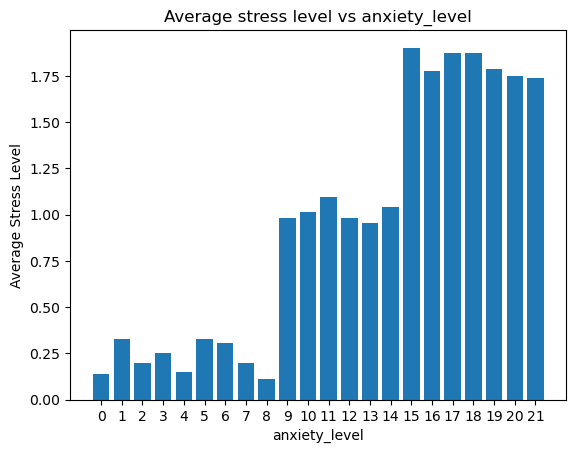

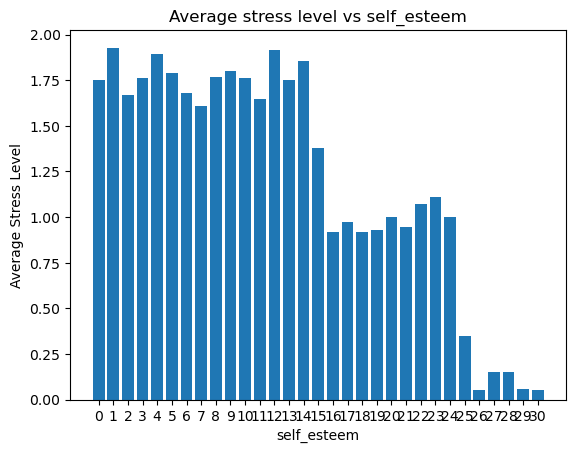

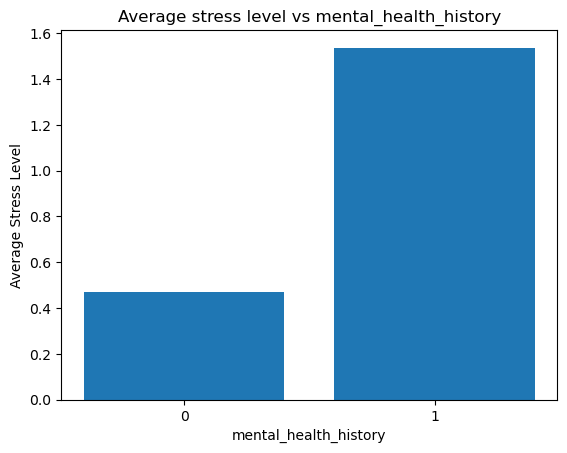

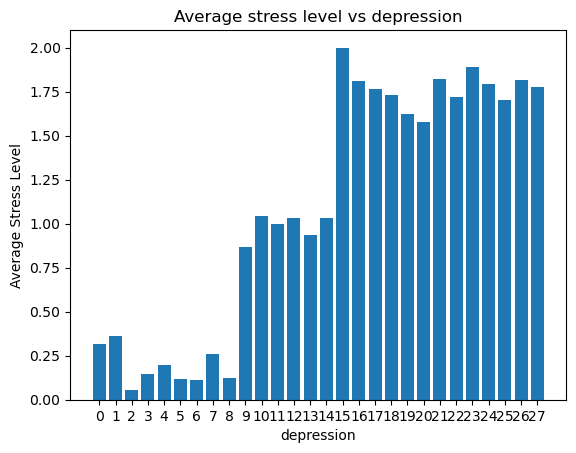

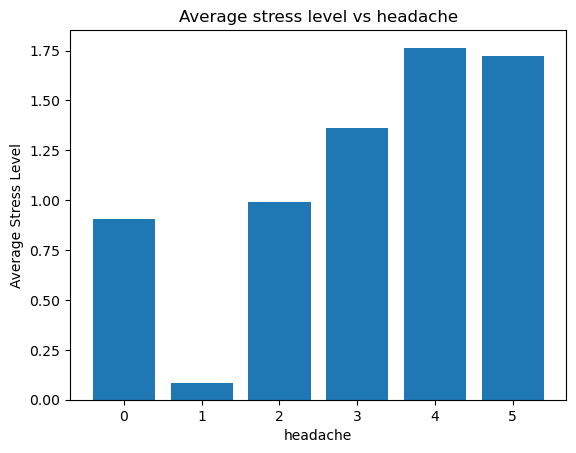

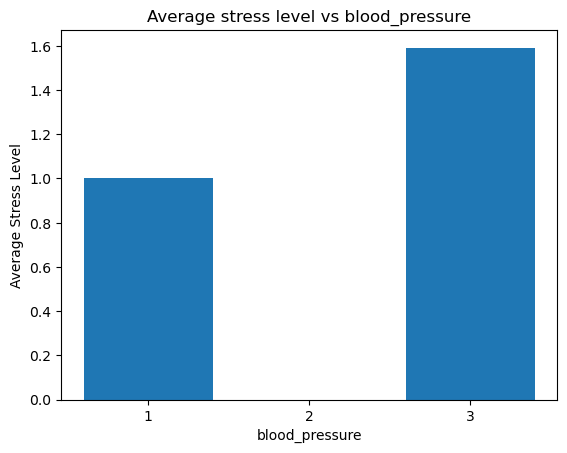

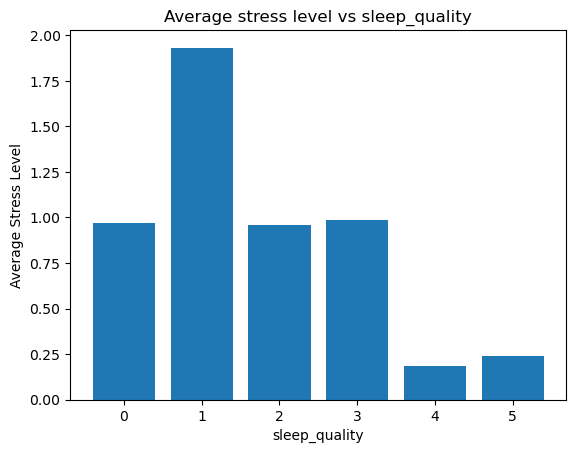

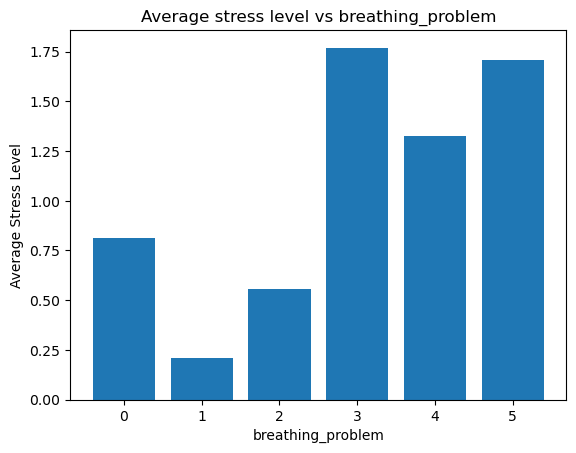

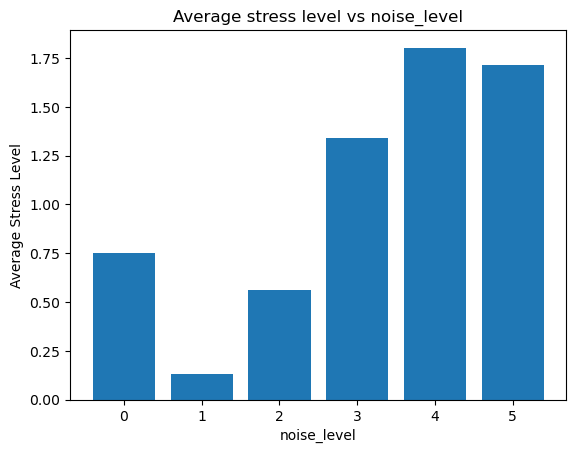

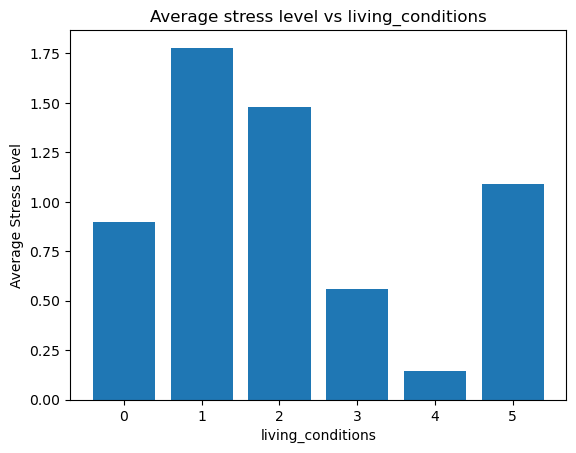

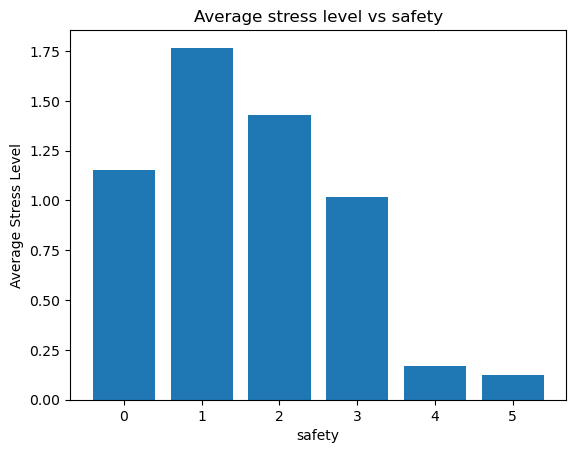

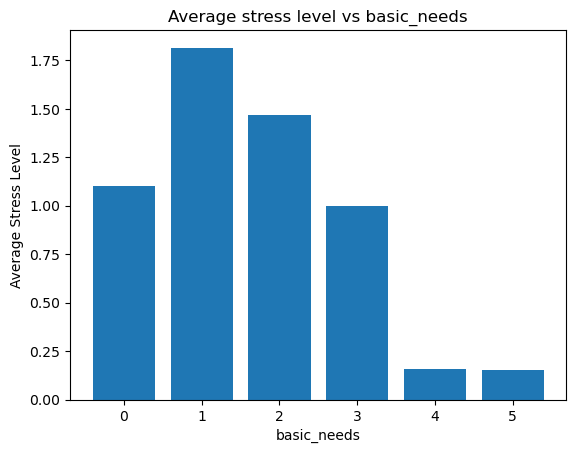

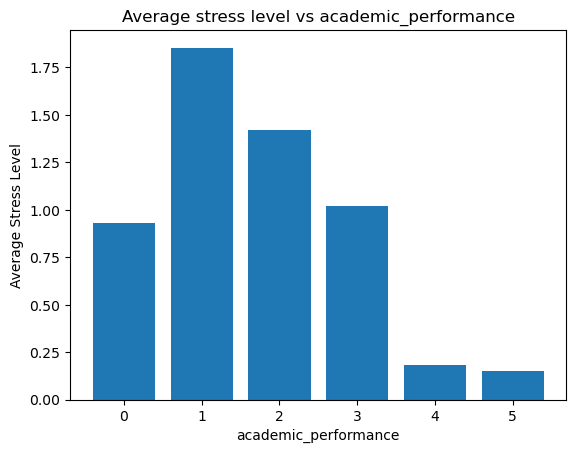

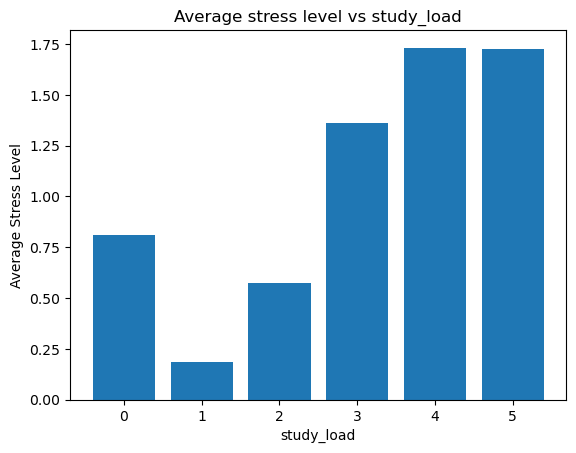

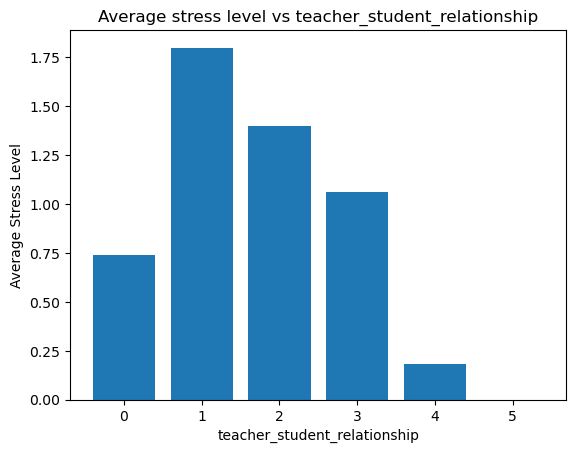

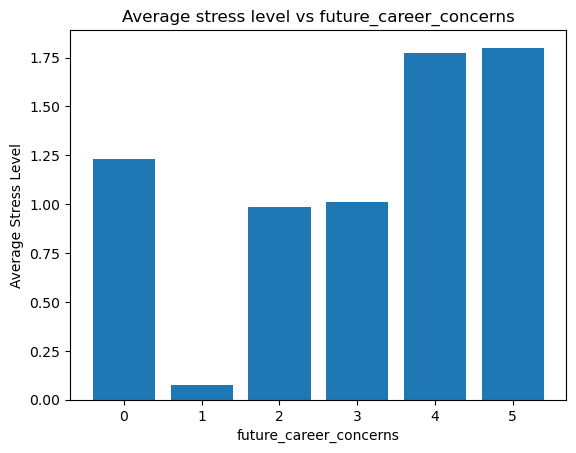

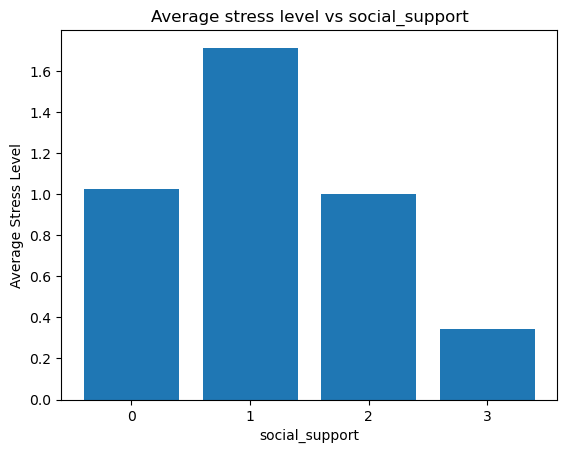

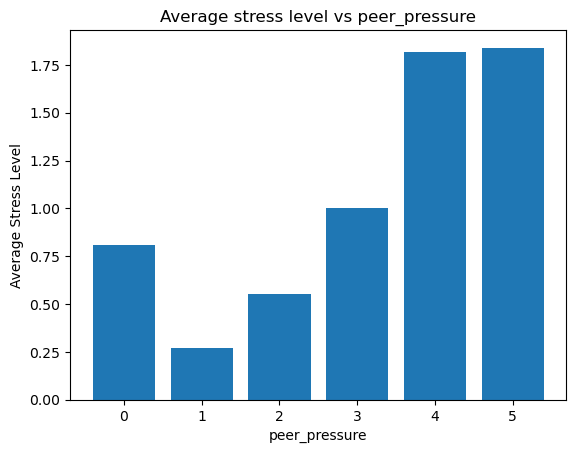

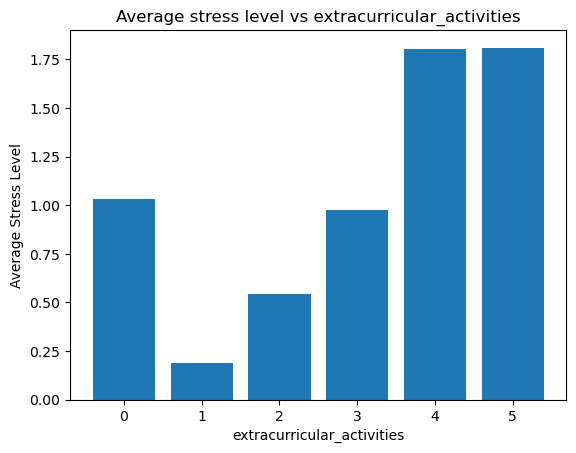

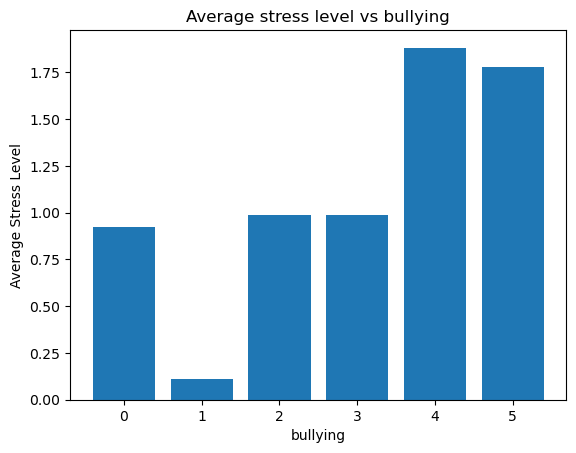

In [13]:
def bar_graph_average_stress(df ,x, maximum_value):
    sums = [0] * (maximum_value+1)
    occurences = [0] * (maximum_value+1)
    for index, row in df.iterrows():
        val = row[x]
        out = row['stress_level']
        occurences[val] += 1
        sums[val] += out
    for i in range(maximum_value+1):
        if occurences[i] != 0: #Divide but check for 0 division
            sums[i]/=occurences[i]
    #Sums is now the average.
    labels = list(range(int(maximum_value)+1))
    plt.bar(labels, sums)
    # Add labels and title
    #print(sums)
    #print(occurences)
    plt.xlabel(x)
    plt.ylabel('Average Stress Level')
    plt.title('Average stress level vs {}'.format(x))
    plt.xticks(labels)
    plt.show()
    
def bar_graph_average_stress_blood_pressure(df):
    x = 'blood_pressure'
    maximum_value = 2
    sums = [0] * (maximum_value+1)
    occurences = [0] * (maximum_value+1)
    for index, row in df.iterrows():
        val = row[x]-1
        out = row['stress_level']
        
        occurences[val] += 1
        #print(val)
        sums[val] += out
    for i in range(maximum_value+1):
        if occurences[i] != 0: #Divide but check for 0 division
            sums[i]/=occurences[i]
    #Sums is now the average.
    labels = [1, 2, 3]
    plt.bar(labels, sums)
    # Add labels and title
    
    plt.xlabel(x)
    plt.ylabel('Average Stress Level')
    plt.title('Average stress level vs {}'.format(x))
    plt.xticks(labels)
    plt.show()

t = df.columns.tolist()[:-1]
max_vals = [21,30,1,27,5,3,5,5,5,5,5,5,5,5,5,5,3,5,5,5]
print(t)
for index, x in enumerate(t):
    if x != 'blood_pressure':
        bar_graph_average_stress(df, x, max_vals[index])
    else:
        bar_graph_average_stress_blood_pressure(df)

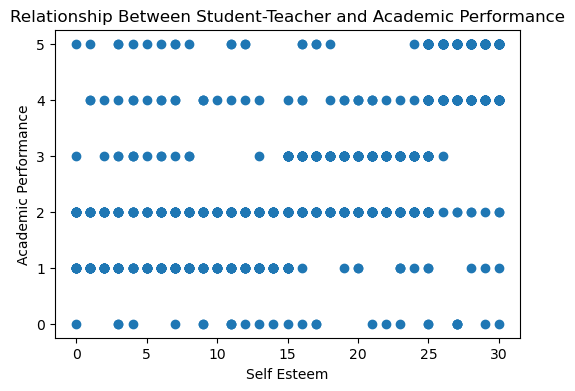

<Axes: xlabel='self_esteem', ylabel='Count'>

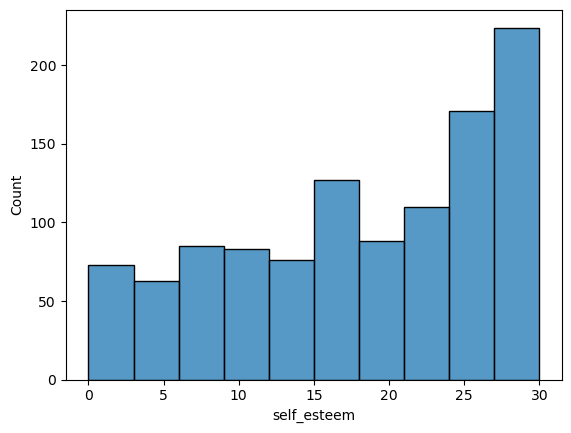

In [19]:
#Self-Esteem Effect on Academic Performance
plt.figure(figsize = (6,4))
plt.scatter(x = 'self_esteem', y = 'academic_performance', data = df)
plt.xlabel('Self Esteem')
plt.ylabel('Academic Performance')
plt.title('Relationship Between Student-Teacher and Academic Performance')
plt.show()


sns.histplot(df.self_esteem, bins = 10)

In [21]:
from scipy import stats

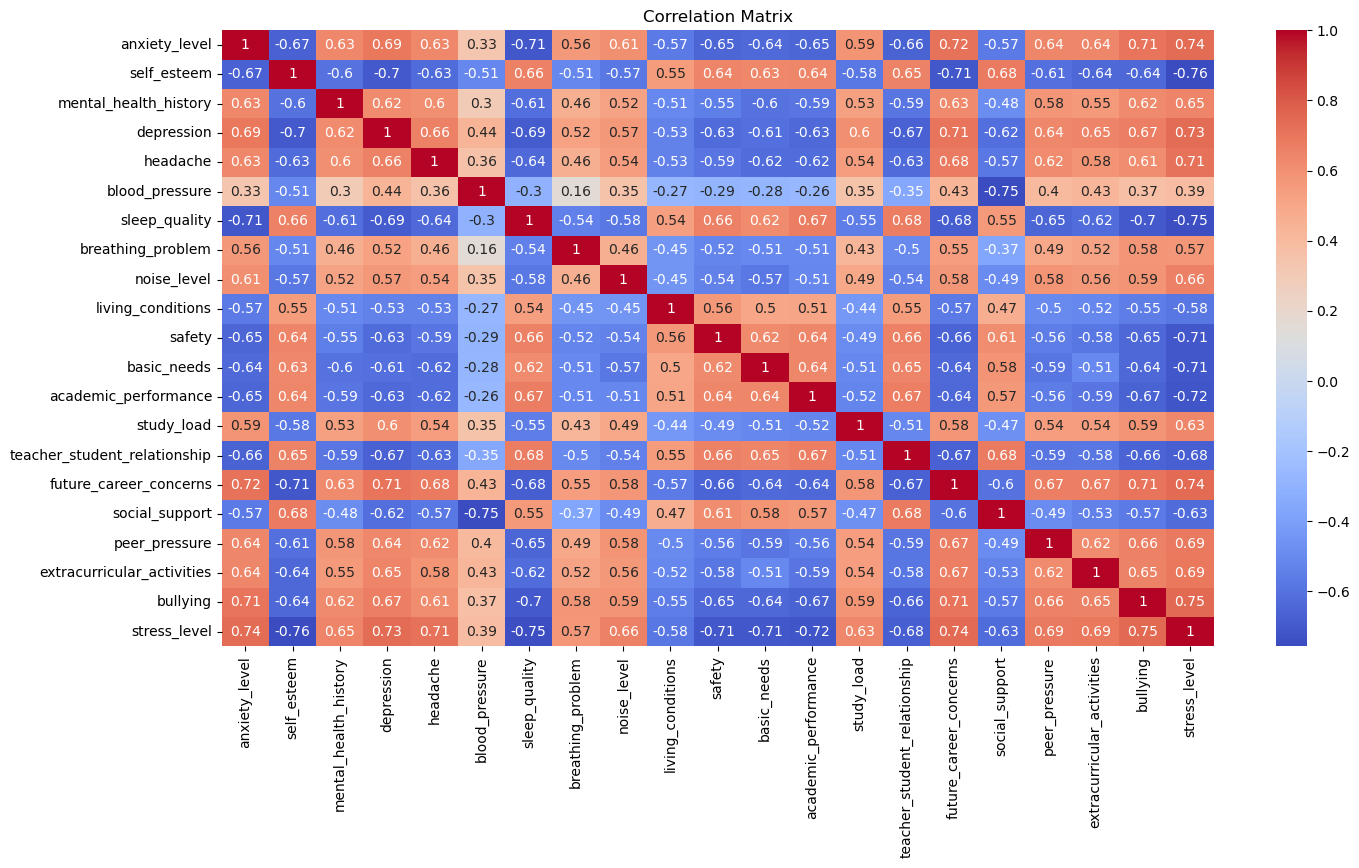

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()

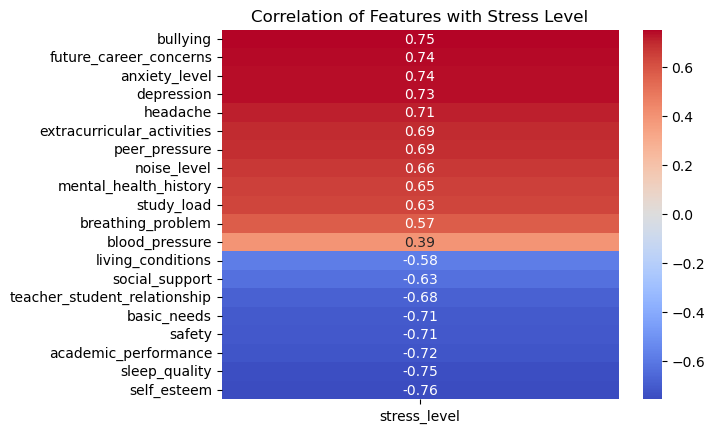

In [28]:
# Correlation heat map only stress level 
correlation = df.corr()
correlation_stress = correlation['stress_level'].sort_values(ascending=False)
correlation_stress = correlation_stress.drop('stress_level')

sns.heatmap(correlation_stress.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Stress Level')
plt.show()

The averrage of self-steem in the dataset is:  17.78
Number of students that have less than the average level of self-steem is:  507


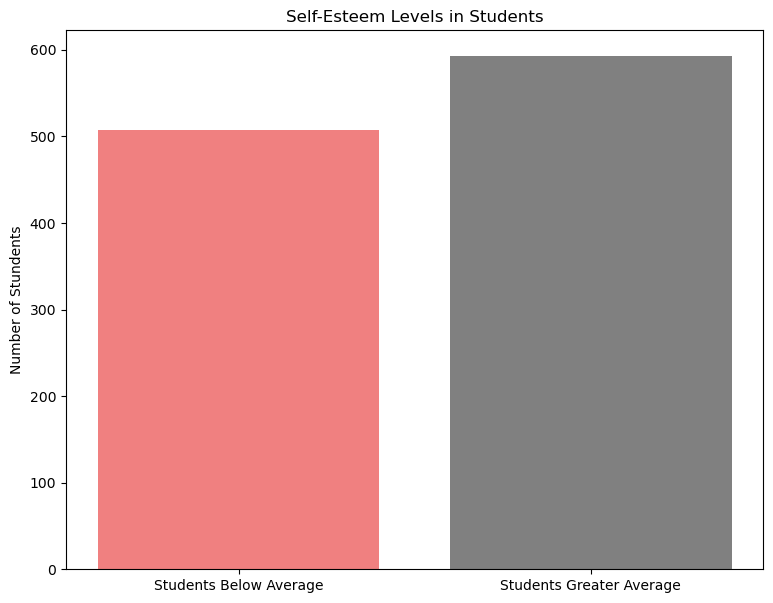

In [35]:
# Calculating average self-steem level of the dataset
average_selfsteem = df['self_esteem'].mean().round(2)
print('The averrage of self-steem in the dataset is: ', average_selfsteem)

# Counting number of students that have less than the average of self-steem
students_below_average = df[df['self_esteem'] < average_selfsteem]['self_esteem'].count()
print('Number of students that have less than the average level of self-steem is: ', students_below_average)

# Visualizing 
plt.figure(figsize=(9, 7))
plt.bar(['Students Below Average', 'Students Greater Average'], [students_below_average, len(df)-students_below_average], color=['lightcoral', 'gray'])
plt.title('Self-Esteem Levels in Students')
plt.ylabel('Number of Stundents')
plt.show()

Number of students of the dataset with depression is:  1056
Percentage of students with depression is:  96.0


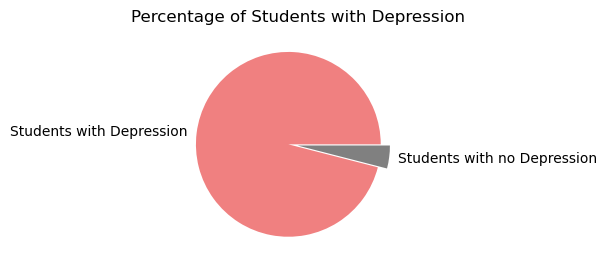

In [37]:
# Calculating number of students that experience depression 
students_with_depression = df[df['depression']>0].shape[0]
print('Number of students of the dataset with depression is: ', students_with_depression)

# Calculating the percentage
percentage_depression = round(students_with_depression / len(df) * 100,2)
print('Percentage of students with depression is: ', percentage_depression)

# Visualizong with pie chart
labels = ['Students with Depression', 'Students with no Depression']
sizes = [students_with_depression, 1100 - students_with_depression]
colors = ['lightcoral', 'gray']
explode = (0.1, 0) 

# Create a pie chart 
plt.figure(figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors)
plt.title('Percentage of Students with Depression')
plt.show()

Text(0.5, 1.0, 'Unscaled Student Stress Box Plot')

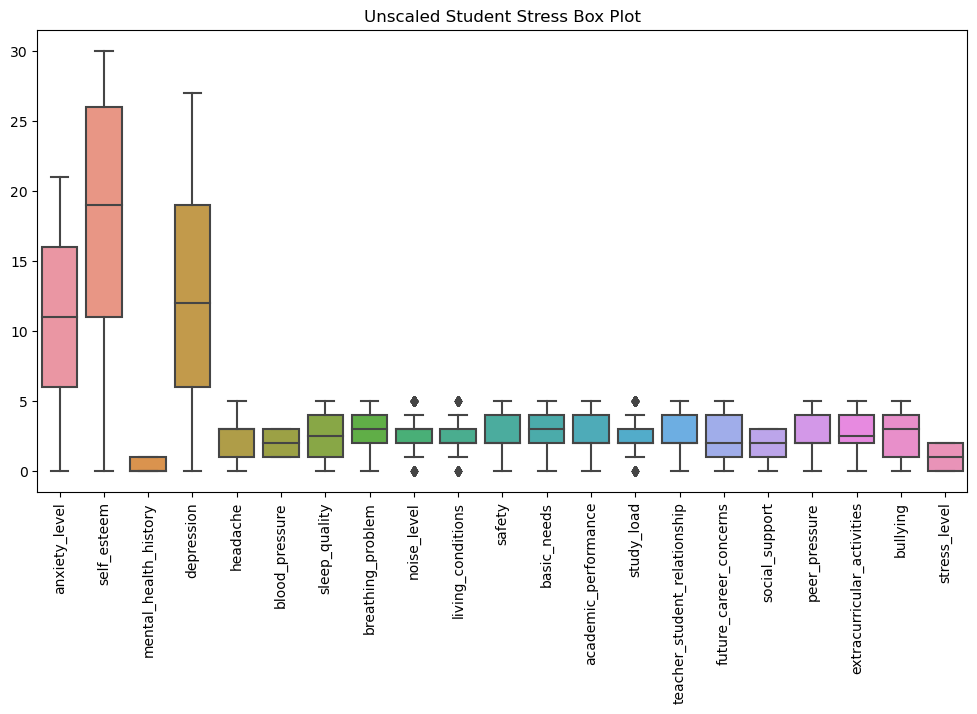

In [39]:
#Initial Data Sorting, Outlier Removal, & Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler
#Outlier Removal via Z-Scores
z_scores=np.abs(stats.zscore(df))
outliers=(z_scores>2).any(axis=1)
    #A threshold of +/-2 generally removes extreme outliers
df_z=df[~outliers]
    #Defines the dataset without extreme outliers

robust_scaler = RobustScaler()
robust_df=pd.DataFrame(robust_scaler.fit_transform(df_z), columns=df.columns)

#Splitting data into x & y for target var.
x_r=robust_df.drop('stress_level', axis=1)
y_r=robust_df['stress_level']
#Unscaled data box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Unscaled Student Stress Box Plot')

In [9]:
print(len(df.loc[df["headache"] >2]), "students experience headaches frequently.")
print(len(df.loc[df["sleep_quality"] < 3]), "students have bad sleep quality.")

import pandas as pd

# Define the mapping of category values to blood pressure values
blood_pressure_mapping = {1: (90, 60), 2: (110, 75), 3: (130, 90)}

# Create systolic and diastolic columns using map
df['systolic'] = df['blood_pressure'].map(lambda x: blood_pressure_mapping[x][0])
df['diastolic'] = df['blood_pressure'].map(lambda x: blood_pressure_mapping[x][1])

# Calculate the mean systolic and diastolic blood pressure
mean_systolic = df['systolic'].mean()
mean_diastolic = df['diastolic'].mean()

# Display the result
print("The average blood pressure is: {}/{}".format(round(mean_systolic, 1), round(mean_diastolic, 1)))

556 students experience headaches frequently.
550 students have bad sleep quality.
The average blood pressure is: 113.6/77.7


In [10]:
print(len(df.loc[df["noise_level"] >= 4]),"students live in high noise level areas.")
print(round((len(df.loc[df["living_conditions"] <= 1])/len(df))*100,2),"% of students feel unsafe in their living conditions.", sep = "")
print(len(df.loc[df["basic_needs"] <= 2]),"students reported, that their basic needs didn't met.")


274 students live in high noise level areas.
18.64% of students feel unsafe in their living conditions.
548 students reported, that their basic needs didn't met.


In [11]:
print(len(df.loc[df["academic_performance"] < df["academic_performance"].mean()]), "students rate their academic performance below avarage.")
print("The avarage study load reported by the students is ", round(df["study_load"].mean(),2)," on a range of 0-5.", sep = "")
print(len(df.loc[df["future_career_concerns"]>= 4]), "students have high concerns about their future careers.")

561 students rate their academic performance below avarage.
The avarage study load reported by the students is 2.62 on a range of 0-5.
371 students have high concerns about their future careers.


In [12]:
print(len(df.loc[df["social_support"]>= 2]), "students feel they have strong social support.")
print(round((len(df.loc[df["bullying"] > 0])/len(df))*100,2),"% of students have experienced bullying.", sep = "")
print(f"{len(df.loc[df['extracurricular_activities'] > 0])} students participate in extracurricular activities.")

600 students feel they have strong social support.
96.45% of students have experienced bullying.
1066 students participate in extracurricular activities.
